# Loading dataset -> IBM-research : deabte_speeches

In [9]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("ibm-research/debate_speeches")
df = ds["train"].to_pandas()

# Debate Speeches Dataset

A comprehensive dataset of annotated debate speeches covering various topics. This collection features a mix of speeches delivered by **human expert debaters** and those generated via **automated AI pipelines**.

In [ ]:
## Printing first 5 rows of the dataframe
df.head()

,topic_id,topic,source,text,goodopeningspeech,mostargumentssupport,interestingspeaker,#labelers,motion_set
0,1161,We should ban cosmetic surgery,Mixed stance control (Human expert),We should ban cosmetic surgery because of the ...,"[2, 4, 2, 2, 2, 5, 4, 3, 2, 2, 5, 4, 5, 2, 3, ...","[2, 4, 3, 3, 2, 4, 4, 3, 2, 5, 5, 4, 5, 4, 2, ...","[2, 5, 2, 2, 2, 3, 4, 2, 2, 2, 5, 4, 5, 4, 2, ...",30,Pipeline-set-1
1,1661,We should ban school uniforms,Mixed stance control (Human expert),"We should ban school uniforms, because they ul...","[2, 5, 5, 4, 2, 2, 3, 3, 3, 2, 4, 1, 2, 2, 2]","[2, 5, 5, 5, 3, 2, 3, 3, 3, 2, 5, 1, 3, 3, 3]","[2, 5, 5, 4, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2]",15,Pipeline-set-1
2,1902,We should legalize ivory trade,Mixed stance control (Human expert),We should legalize the ivory trade because at ...,"[5, 4, 3, 2, 4, 4, 4, 4, 4, 1, 4, 4, 2, 4, 3]","[5, 5, 2, 3, 5, 5, 4, 4, 4, 2, 4, 4, 2, 3, 3]","[5, 4, 3, 1, 5, 5, 4, 4, 4, 1, 4, 4, 4, 3, 3]",15,Pipeline-set-1
3,2108,Surrogacy should be banned,Mixed stance control (Human expert),Surrogates you should be banned because of the...,"[4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1]","[5, 5, 3, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 2]","[4, 5, 3, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 1]",15,Pipeline-set-1
4,2110,We should lower the age of consent,Mixed stance control (Human expert),We should lower the age of consent for two big...,"[4, 4, 4, 4, 2, 4, 3, 3, 1, 4, 4, 2, 3, 5, 5]","[4, 4, 4, 4, 2, 4, 3, 3, 2, 4, 4, 4, 4, 5, 5]","[3, 3, 4, 4, 2, 4, 4, 4, 1, 4, 4, 3, 4, 5, 5]",15,Pipeline-set-1


## Overview

The quality of these speeches is evaluated and scored by human annotators to provide a ground truth for debate analysis and quality assessment.

### 1. Opening Speeches

This subset consists of annotated opening speeches, as featured in the *Project Debater* paper published in *Nature*.

* **Content:** Each row contains a single opening speech arguing **in favor** of a specific topic (e.g., *"Blood donation should be mandatory"*).
* **Source:** Human experts vs. Automated pipelines.
* **Detailed Methodology:** [Link to Data Collection Process]

### 2. Annotation & Scoring

Each speech was rigorously scored by **15 crowd annotation workers** across three key dimensions:

| Dimension | Column Name | Description |
| --- | --- | --- |
| **Quality** | `goodopeningspeech` | "This speech is a good opening speech for supporting the topic." |
| **Relevance** | `mostargumentssupport` | "Most arguments in this speech support the topic." |
| **Engagement** | `interestingspeaker` | "The content is interesting and informative." |

#### Scoring Scale

Annotations use a **5-point Likert scale**, mapped as follows:

* **5**: Strongly Agree
* **4**: Agree
* **3**: Neither agree nor disagree
* **2**: Disagree
* **1**: Strongly disagree

### Speech Generation Sources (`source` column)

The `source` column identifies the origin of each debate speech. These are categorized into human-authored, fully automated systems, and quality control mixtures.

#### 1. Human-Centric Sources

* **Human Expert**: Transcriptions of live recorded speeches delivered by professional human debaters.
* **Arg-Human1**: Individual arguments written by crowd workers, selected from a high-quality collection and ordered using the **Topological Sort** algorithm.
* **Arg-Human2**: Individual arguments extracted and curated from news corpora, also ordered via **Topological Sort**.

#### 2. Automated & AI Pipelines

* **Project Debater**: Speeches authored by IBM’s specialized, automated *Project Debater* system.
* **Speech-GPT2**: Full speeches generated by a **GPT2-large** model that was fine-tuned specifically on human speech transcripts.
* **Arg-GPT2**: Individual arguments generated by a **GPT2-large** model fine-tuned on argument data, organized via **Topological Sort**.
* **Summit**: Speeches created using a summarization-based pipeline. This system uses the **Summit** multi-document summarizer to process news articles related to the debate topic.
* **Arg-Search**: Individual arguments retrieved using the **ArgumenText** project, organized via **Topological Sort**.

#### 3. Control Samples

* **Mixed Stance Control**: These are "test" speeches used to monitor annotation quality. Each is a mixture of two human transcripts—one **pro** and one **con**—regarding the same topic.

In [ ]:
## Printing the shape(rows.columns) of the dataframe
df.shape

(948, 9)

### The dataset have 948 rows and 9 columns

In [ ]:
## Printing the datatype of each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   topic_id              948 non-null    object
 1   topic                 948 non-null    object
 2   source                948 non-null    object
 3   text                  946 non-null    object
 4   goodopeningspeech     948 non-null    object
 5   mostargumentssupport  948 non-null    object
 6   interestingspeaker    948 non-null    object
 7   #labelers             948 non-null    int64 
 8   motion_set            948 non-null    object
dtypes: int64(1), object(8)
memory usage: 66.8+ KB


In [ ]:
## Getting count of null values in each column of the dataframe
df.isnull().sum()

topic_id                0
topic                   0
source                  0
text                    2
goodopeningspeech       0
mostargumentssupport    0
interestingspeaker      0
#labelers               0
motion_set              0
dtype: int64

In [42]:
## Filling missing values with an empty string in the "text" column and creating a new column "text_length" to store the length of the text
df[df["text"].isnull()]
df[df["text"].str.strip() == ""]

,topic_id,topic,source,text,goodopeningspeech,mostargumentssupport,interestingspeaker,#labelers,motion_set,text_length,word_count,lexical_diversity,goodopeningspeech_avg,mostargumentssupport_avg,interestingspeaker_avg


### The dataset is a cleaned dataset with no null values except in the column "text" which has just 2 null entries.

In [41]:
## Checking Duplicates

df.duplicated().sum()

0

### The dataset have zero duplicate entries.

In [ ]:
## Getting count of unique values in each column of the dataframe
df.nunique()

topic_id                114
topic                   114
source                    9
text                    946
goodopeningspeech       946
mostargumentssupport    938
interestingspeaker      947
#labelers                 3
motion_set                2
dtype: int64

### Inference:
- We have a total of 114 unique topics in 948 rows
- The data is collected from 9 sources.
- Text column has all unique arguments except 2 columns which are null.
- There are 3 labelers in the dataset.
- There are 2 motion set.

## Text Length Distribution

In [23]:
# Filling missing values with an empty string in the "text" column and creating a new column "text_length" to store the length of the text
df["text_length"] = df["text"].fillna("").apply(len)

df["text_length"].describe()

count     948.000000
mean     3637.333333
std       858.437797
min         0.000000
25%      3454.500000
50%      3878.500000
75%      4153.000000
max      5505.000000
Name: text_length, dtype: float64

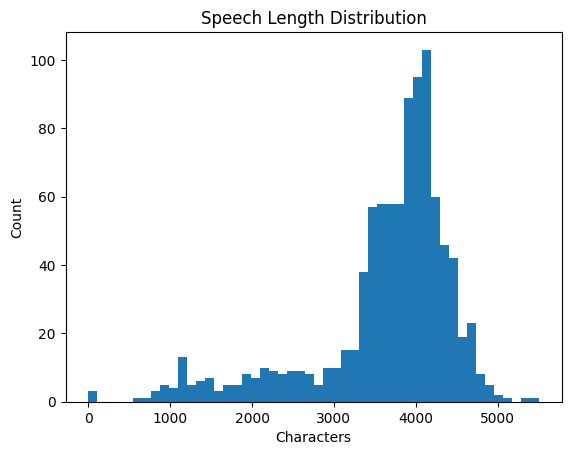

In [24]:
import matplotlib.pyplot as plt

plt.hist(df["text_length"], bins=50)
plt.title("Speech Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()

### EDA Observation: Text Length Analysis

- Central Tendency: The average speech length is approximately 3,637 characters, with the majority of speeches concentrated in the 3,500–4,500 range.

- Data Quality: The histogram reveals a few instances of very short or zero-length speeches. These represent outliers that may require filtering before the training phase to ensure the model learns from substantive arguments.

- Structural Uniformity: The sharp peak in the distribution suggests that both human and synthetic speeches in this dataset follow a consistent structural format for opening statements.

C:\Users\hp\AppData\Local\Temp\ipykernel_13860\4273767432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='source', y='text_length', palette='Set2')
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.

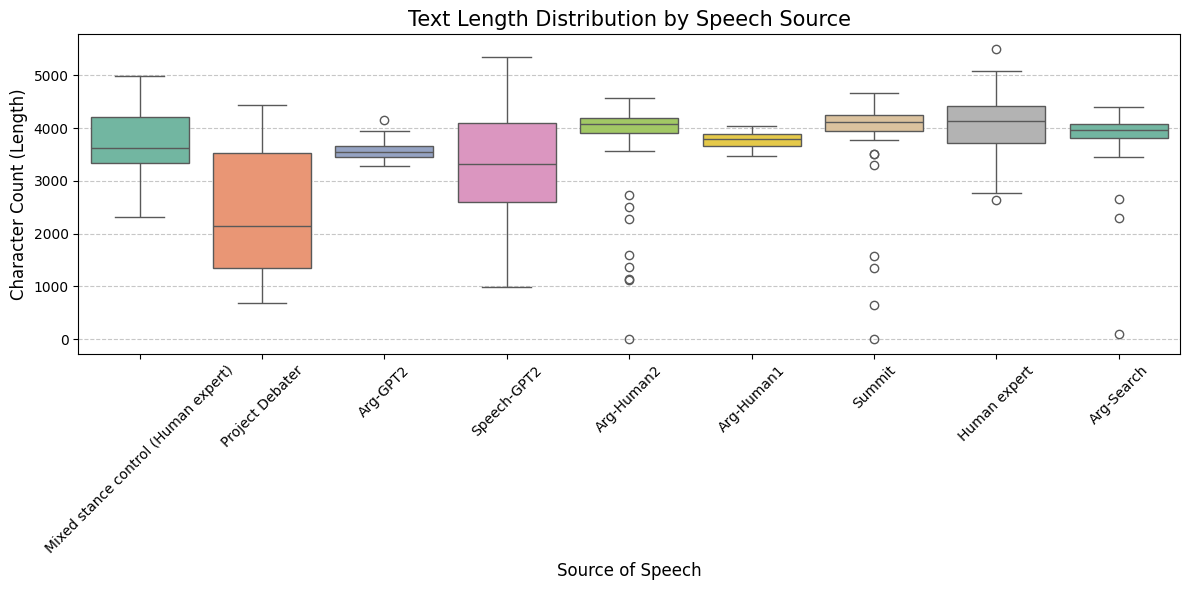

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the boxplot
# Using 'source' on X and 'text_length' on Y
sns.boxplot(data=df, x='source', y='text_length', palette='Set2')

# Formatting the plot
plt.title("Text Length Distribution by Speech Source", fontsize=15)
plt.xlabel("Source of Speech", fontsize=12)
plt.ylabel("Character Count (Length)", fontsize=12)
plt.xticks(rotation=45) # Rotates the labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **EDA Observations: Text Length by Speech Source**

* **Human Consistency vs. AI Variance:** * **Human expert** and **Mixed stance control** speeches show a relatively tight distribution with a high median (approx. 4,000 characters). This indicates that expert human debaters tend to follow a standardized, professional length for opening speeches.
    * **Speech-GPT2** and **Project Debater** exhibit much higher variance (taller boxes). This suggests that these AI systems are less "disciplined" in their output length, sometimes producing very long speeches and other times much shorter ones.


* **The Outlier Problem (Quality Control):**
    * Significant **bottom-heavy outliers** (near 0–1,000 characters) are visible in **Arg-Human2**, **Summit**, and **Arg-Search**.
    * **Inference:** These sources likely contain "failed" generations or truncated arguments. For the ML modeling phase, a pre-processing step is required to filter out these short entries (e.g., any speech < 1,000 characters) to ensure the model learns from substantive text.


* **Model-Specific Characteristics:**
    * **Arg-GPT2** and **Arg-Human1** are surprisingly consistent but have smaller ranges compared to full speeches.
    * **Summit** maintains a very high median length but has a significant number of extreme low-length outliers, suggesting a "hit or miss" generation pattern where it either produces a full-length summary or fails entirely.


* **Data Integrity:**  The **minimum value of 0.0** seen in the summary statistics is clearly visualized as outliers in **Arg-Human2** and **Summit**. This confirms that the dataset contains empty or null strings that must be handled before training.

## Word-Level Analysis

In [26]:
df["word_count"] = df["text"].fillna("").apply(lambda x: len(x.split()))

df["word_count"].describe()

count    948.000000
mean     604.424051
std      143.078425
min        0.000000
25%      602.000000
50%      616.000000
75%      653.000000
max      966.000000
Name: word_count, dtype: float64

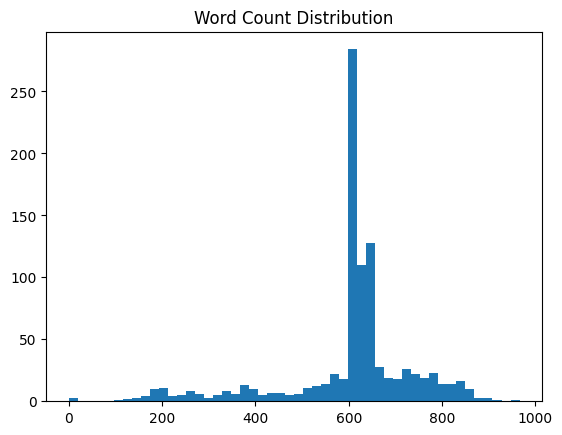

In [27]:
plt.hist(df["word_count"], bins=50)
plt.title("Word Count Distribution")
plt.show()

### **EDA Observations: Word Count Analysis**

* **Standard Speech Length:**
    * The **average word count is approximately 604 words**, with a very sharp peak (mode) occurring around the **600–650 word mark**.
    * **Inference:** This suggests a highly standardized target for opening speeches. In competitive debate or Project  Debater settings, 600 words typically equates to about 4–5 minutes of speaking time at a moderate pace, indicating the dataset is aligned with real-world debate constraints.


* **Distribution Shape and Consistency:**
    * The **median (616 words)** is higher than the **mean (604 words)**, and the interquartile range (IQR) is quite tight (602 to 653 words).
    * **Inference:** The data is "leptokurtic" (highly peaked). This means the vast majority of your samples are extremely consistent in length.


* **Significant Low-End Tail:**
    * The histogram shows a long "tail" to the left, with some speeches containing **0 words** (as seen in the `min` value) and others scattered between 100 and 400 words.
    * **Inference:** These are the same outliers identified in the character count analysis. Since these fall significantly below the 25th percentile (602 words), they likely represent failed text extractions or incomplete arguments.


* **Vocabulary Density:**
    * Comparing this to the character count (mean ~3637), the average word length in this dataset is roughly **6 characters per word**.
    * **Inference:** This indicates a sophisticated vocabulary (typical of expert debaters or formal AI models), as the average English word length in casual conversation is usually closer to 4.5–5 characters.

### Measuring the Lexical Diversity (how many unique words are used compared to the total word count), we will calculate the Type-Token Ratio (TTR)

C:\Users\hp\AppData\Local\Temp\ipykernel_13860\130369610.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='source', y='lexical_diversity', palette='magma', capsize=.1)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

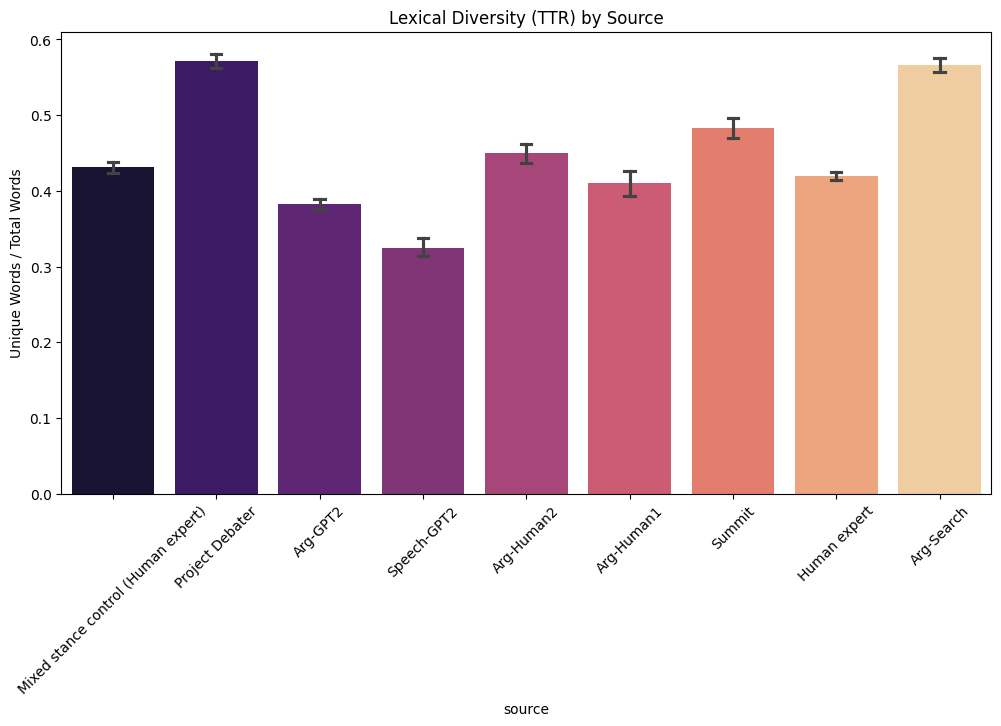

In [29]:
# Function to calculate Type-Token Ratio
def calculate_ttr(text):
    words = text.lower().split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Apply the function
df["lexical_diversity"] = df["text"].fillna("").apply(calculate_ttr)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='source', y='lexical_diversity', palette='magma', capsize=.1)
plt.xticks(rotation=45)
plt.title("Lexical Diversity (TTR) by Source")
plt.ylabel("Unique Words / Total Words")
plt.show()

### **Inference: Lexical Diversity (TTR)**

* **AI "Vocabulary Loops":** **Speech-GPT2** has the lowest diversity (approx. 0.32), likely due to the model repeating common phrases or falling into "lexical cycles".
* **Knowledge-Rich Systems:** **Project Debater** and **Arg-Search** lead in diversity (0.55+), suggesting they pull from a wider, more technical range of external sources.
* **Human Baseline:** **Human experts** show a stable, moderate diversity (~0.42), serving as a balanced benchmark for "natural" word variety.
* **Data Quality:** The tight error bars across all categories prove that these vocabulary patterns are consistent and not skewed by a few outlier speeches.

## Quality Score Distribution

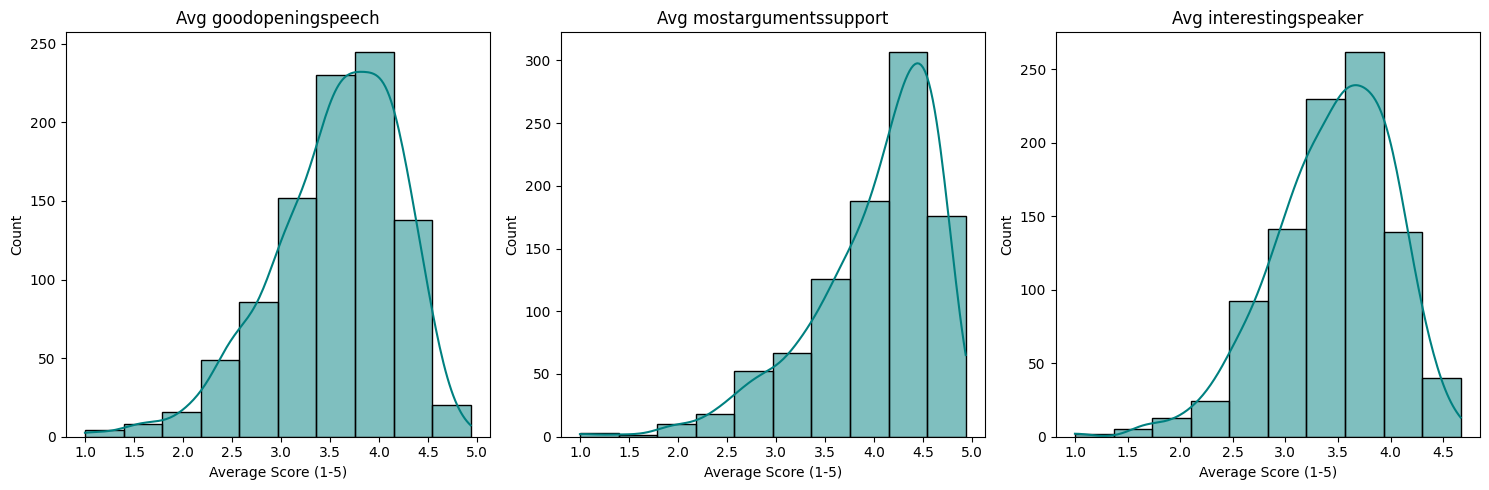

In [36]:
import ast

# Function to safely convert string representation of list to actual list and get mean
def get_mean_score(score_input):
    if isinstance(score_input, str):
        # This converts "[4, 3, 5...]" into a real Python list
        score_list = ast.literal_eval(score_input)
    else:
        score_list = score_input
    return sum(score_list) / len(score_list)

# Create new columns for the average scores
for col in ['goodopeningspeech', 'mostargumentssupport', 'interestingspeaker']:
    df[f'{col}_avg'] = df[col].apply(get_mean_score)

# Now plot the distribution of the AVERAGES
plt.figure(figsize=(15, 5))
avg_cols = ['goodopeningspeech_avg', 'mostargumentssupport_avg', 'interestingspeaker_avg']

for i, col in enumerate(avg_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=10, kde=True, color='teal')
    plt.title(f'Avg {col.replace("_avg", "")}')
    plt.xlabel('Average Score (1-5)')

plt.tight_layout()
plt.show()

### Quality Score Distribution Inference

The following observations summarize the human-annotator scores across the three key dimensions: **Quality** (`goodopeningspeech`), **Relevance** (`mostargumentssupport`), and **Engagement** (`interestingspeaker`).

* **Positive Skewness:** All three distributions show a significant "left-skew," with the majority of average scores clustering between **3.5 and 4.5**. This indicates that the dataset is primarily composed of high-quality, relevant speeches.
* **High Argument Relevance:** The `mostargumentssupport` metric shows the strongest concentration at the higher end of the scale. This suggests that both human and AI-generated speeches were highly effective at staying on-topic and providing supporting arguments.
* **Engagement Variance:** While still positive, the `interestingspeaker` distribution is slightly broader than the others. This indicates more variability in how "interesting" annotators found the content, likely reflecting the diverse range of generation sources (e.g., GPT-2 vs. Human).
* **Data Density & Consensus:** The smooth KDE (Kernel Density Estimate) lines confirm that averaging the 15 individual labelers' scores provides a reliable, continuous quality metric for the ML-service to predict, rather than noisy discrete values.

## Topic Analysis

In [37]:
df["topic"].value_counts()

topic
We should ban cosmetic surgery                   10
We should abolish foster care                    10
We should ban factory farming                    10
Assisted suicide should be a criminal offence    10
We should subsidize Wikipedia                    10
                                                 ..
We should increase the use of credit unions       5
We should close the sex offender registry         5
We should not subsidize athletes                  5
Health education should be mandatory              5
We should subsidize space exploration             5
Name: count, Length: 114, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_13860\4290537597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='topic', order=df['topic'].value_counts().iloc[:20].index, palette='viridis')
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped

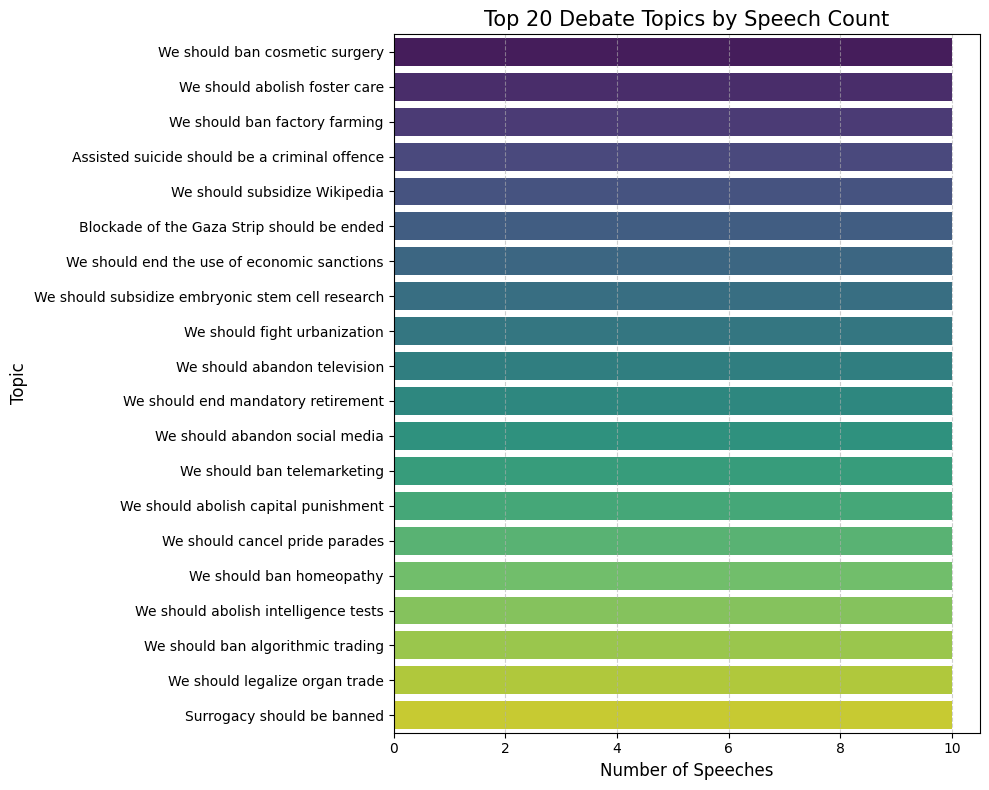

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 20 most frequent topics
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='topic', order=df['topic'].value_counts().iloc[:20].index, palette='viridis')

plt.title('Top 20 Debate Topics by Speech Count', fontsize=15)
plt.xlabel('Number of Speeches', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### **Inference: Debate Topic Distribution**

* **Perfect Balance:** The dataset shows an exceptionally uniform distribution, with exactly **10 speeches per topic** across all top 20 motions.
* **Diverse Domain Coverage:** The topics span ethical, social, and economic domains (e.g., *"Surrogacy should be banned"* to *"We should legalize organ trade"*), providing a robust foundation for an all-purpose **AI-Debate-Analyzer**.
* **Controlled Environment:** Such a clean, even split suggests this subset was curated specifically for benchmarking, where the "topic" variable is kept constant to better evaluate the "source" (Human vs. AI) performance.

# Basic NLP Analysis

## Average Sentence Length

In [44]:
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize

df["sentence_count"] = df["text"].fillna("").apply(lambda x: len(sent_tokenize(x)))
df["avg_sentence_length"] = df["word_count"] / df["sentence_count"]

df["avg_sentence_length"].describe()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    946.000000
mean      21.003975
std        6.893868
min        9.121212
25%       16.397404
50%       19.587702
75%       24.203704
max       55.866667
Name: avg_sentence_length, dtype: float64

### **Inference: Sentence Length**

* **Formal Tone:** An average of **21 words per sentence** confirms a professional, academic-level argumentative style.
* **Consistency:** A **standard deviation of 6.8** indicates a disciplined and stable rhetorical structure across the dataset.
* **Structural Range:** Variation from **9 to 55 words** reflects a mix of concise "hooks" and complex logical chains.
* **Balanced Data:** The **median (19.5)** aligns closely with the mean, suggesting a well-distributed dataset.

## Vocabulary Size

In [54]:
from collections import Counter

all_words = " ".join(df["text"].fillna("")).split()
vocab = Counter(all_words)

print("Length of vocabulary: ",len(vocab))
print("Most common words: ")
print(vocab.most_common(20), end="\n\n")

Length of vocabulary:  34777
Most common words: 
[('the', 24500), ('to', 20882), ('of', 15364), ('and', 14644), ('that', 14628), ('a', 12816), ('is', 11548), ('in', 9352), ('for', 5823), ('be', 5510), ('are', 5342), ('it', 4515), ('we', 4136), ('should', 3818), ('have', 3764), ('The', 3670), ('people', 3493), ('as', 3290), ('on', 3113), ('not', 3027)]



## Checking Extreme Samples

In [60]:
# Printing Longest Speeches
print("--- TOP 5 LONGEST SPEECHES ---")
print(df.sort_values("word_count", ascending=False)[['source', 'word_count', 'topic']].head(5))

print("\n" + "="*30 + "\n")

# Printing Shortest Speeches
print("--- TOP 5 SHORTEST SPEECHES ---")
print(df.sort_values("word_count")[['source', 'word_count', 'topic']].head(5))

--- TOP 5 LONGEST SPEECHES ---
           source  word_count                                     topic
773  Human expert         966      We should subsidize higher education
804  Human expert         914  We should introduce year round schooling
746  Human expert         895             We should abolish foster care
709  Human expert         889                   We should ban abortions
774  Human expert         889          We should legalize sex selection


--- TOP 5 SHORTEST SPEECHES ---
              source  word_count  \
423       Arg-Human2           0   
629           Summit           0   
849       Arg-Search          19   
589           Summit         100   
114  Project Debater         126   

                                                 topic  
423  We should increase airport racial profiling in...  
629  We should increase airport racial profiling in...  
849                     We should legalize organ trade  
589          We should adopt the teacher tenure reform  
1

# Structural EDA: Argumentative Feature Extraction

### Keyword-Based Detection

In [62]:
# Define indicator sets
claim_indicators = ['believe', 'should', 'must', 'therefore', 'conclude']
evidence_indicators = ['study', 'research', 'according to', 'data', 'evidence', 'percent']
counter_indicators = ['however', 'although', 'but', 'on the contrary', 'opponents argue']

def check_argument_structure(text):
    text = str(text).lower()
    return {
        'has_claim': any(word in text for word in claim_indicators),
        'has_evidence': any(word in text for word in evidence_indicators),
        'has_counter': any(word in text for word in counter_indicators)
    }

structure_df = df['text'].apply(check_argument_structure).apply(pd.Series)
df = pd.concat([df, structure_df], axis=1)

# Calculate the percentage of speeches containing each element
print("--- Argument Structure Breakdown (%) ---")
print(df[['has_claim', 'has_evidence', 'has_counter']].mean() * 100)

--- Argument Structure Breakdown (%) ---
has_claim       89.662447
has_claim       89.662447
has_evidence    41.033755
has_evidence    41.033755
has_counter     77.109705
has_counter     77.109705
dtype: float64


### **Inference: Argumentative Structural Analysis**

* **High Stance Consistency:** With **89.7%** of speeches containing **Claim** indicators, the dataset is highly reliable for training models to identify specific debate positions.
* **Dialectical Maturity:** A **77.1%** presence of **Counter-argument** markers shows that the dataset prioritizes sophisticated "back-and-forth" reasoning over simple one-sided statements.
* **Rhetorical Style:** The lower **Evidence** rate (**41.0%**) suggests a focus on logical and philosophical persuasion rather than purely data-heavy or statistical debating.
* **Feature Viability:** The strong presence of these structural "anchors" makes them excellent features for your **ml-service** to distinguish between high-quality arguments and generic text.